In [1]:
import numpy as np
import pandas as pd
from textwrap import wrap
from matplotlib import pyplot as plt
from sklearn import metrics
import matplotlib.ticker as mticker
import sys, os
from hsbmpy import plot_topic_size, get_max_available_L

In [2]:
directory="/home/fvalle/phd/datasets/gtex/log/10/"
os.chdir(directory)
sys.path.append('/home/fvalle/phd/master_thesis/')

In [3]:
L = get_max_available_L(directory)

In [4]:
df = pd.read_csv("mainTable.csv", index_col=[0])

# topic size

In [ ]:
for l in range(0,L+1):
    plot_topic_size(directory,l)

## Topic O

In [ ]:
df = pd.read_csv("mainTable.csv", index_col=0,header=0)

In [ ]:
df_mv=pd.DataFrame(data=[df.mean(1), df.var(1),df.apply(lambda x: len([x[x>0]])/float(len(x)), 1)], index=['average', 'var', 'O']).transpose()
df_mv.head()

In [ ]:
for l in range(0,L+1):
    fig = plt.figure(figsize=(15,8))
    ax = fig.subplots(1,2)
    candles = get_candles(directory,l,df_mv,ax[0])
    candlestick2_ohlc(ax[0], candles['open'],candles['high'],candles['low'],candles['close'],width=0.6,colordown='b')
    ax[1].hist((np.array(candles['open'])+np.array(candles['close']))/2, weights=candles['size'], range=(-0.05,1.05), bins=10, histtype='step')
    ax[1].set_xlabel("$O_i", fontsize=18)
    plt.show()
    fig.savefig("%s/topic_Ocandles_level_%d.pdf"%(directory,l))

# Geneontology

In [5]:
from geneontology import get_ontology_df, ensg_to_symbol
from tableanalyser import get_symbol
import gseapy as gs

In [ ]:
import importlib, geneontology,tableanalyser
importlib.reload(geneontology)
importlib.reload(tableanalyser)
from geneontology import get_ontology_df, ensg_to_symbol
from tableanalyser import get_symbol

In [6]:
l=L
df_topics = pd.read_csv("%s/topsbm/topsbm_level_%d_topics.csv"%(directory,l))

In [7]:
df_symbols= pd.read_csv("https://www.genenames.org/cgi-bin/download/custom?col=gd_hgnc_id&col=gd_app_sym&col=gd_pub_ensembl_id&col=md_ensembl_id&col=md_eg_id&status=Approved&status=Entry%20Withdrawn&hgnc_dbtag=on&order_by=gd_app_sym_sort&format=text&submit=submit", index_col=[0], sep='\t')

In [8]:
def get_sea():
    for g in df_topics.values.ravel()[[str(s)!='nan' for s in df_topics.values.ravel()]]:
        yield get_symbol(g)

In [9]:
with open("gback.txt",'w') as f:
    list(map(lambda x: f.writelines(x+'\n')if len(x)>1 else None, get_sea()))
    
with open("gback_ensg.txt",'w') as f:
    list(map(lambda x: f.writelines(x[:15]+'\n')if len(x)>1 else None, df_topics.values.ravel()[[str(s)!='nan' for s in df_topics.values.ravel()]]))

In [ ]:
gs.get_library_name()

In [10]:
gene_sets = ['GO_Molecular_Function_2018',
             'GO_Biological_Process_2018',
             'GO_Cellular_Component_2018',
             'Human_Phenotype_Ontology',
             'WikiPathways_2019_Human',
             '/home/fvalle/MSigDB/h.all.v7.0.symbols.gmt',
             '/home/fvalle/MSigDB/c2.cp.v7.0.symbols.gmt'
            ]

In [12]:
threshhold = 5e-1
cutoff = 5e-1
background = len([g for g in get_sea()])
os.system("mkdir -p gsea")
for itopic,topic in enumerate(df_topics.columns):
    try:
        enriched_topic = pd.read_csv("gsea/gsea_level_%d_topic_%d.csv"%(l,itopic+1), index_col=[0])
        print(topic)
    except:
        try:
            gene_list = ensg_to_symbol(df_topics.loc[:,topic].dropna().values)
            print(topic)
            enriched_topic = get_ontology_df(gene_list, cutoff=cutoff, threshhold = threshhold, gene_sets = gene_sets, background=background)
            enriched_topic = enriched_topic.sort_values(by=['Adjusted P-value'], ascending=True)[:20]
            enriched_topic.to_csv("gsea/gsea_level_%d_topic_%d.csv"%(l,itopic+1))
        except:
            print(*sys.exc_info())
            continue
    print(enriched_topic)

Topic 1


2020-01-29 10:48:54,589 Warning: No enrich terms using library CUSTOM139961913803688 when cutoff = 0.5
2020-01-29 10:48:54,711 Warning: No enrich terms using library CUSTOM139961910615280 when cutoff = 0.5


                                                   Term  Adjusted P-value  \
1502       Autosomal recessive inheritance (HP:0000007)      8.329540e-08   
1503              Palmoplantar keratoderma (HP:0000982)      2.336702e-05   
222                     muscle contraction (GO:0006936)      4.055928e-04   
225                muscle filament sliding (GO:0030049)      4.470801e-04   
223   positive regulation of peptide secretion (GO:0...      5.354859e-04   
224          actin-myosin filament sliding (GO:0033275)      5.961068e-04   
226      extracellular matrix organization (GO:0030198)      1.229326e-03   
227                 sarcomere organization (GO:0045214)      2.651894e-03   
231    cardiac muscle tissue morphogenesis (GO:0055008)      3.426095e-03   
230             cardiac muscle contraction (GO:0060048)      3.806772e-03   
229   positive regulation of hormone secretion (GO:0...      4.164888e-03   
1962          Striated Muscle Contraction Pathway WP383      4.169001e-03   

2020-01-29 10:50:01,470 Warning: No enrich terms using library CUSTOM139961792114048 when cutoff = 0.5
2020-01-29 10:50:01,614 Warning: No enrich terms using library CUSTOM139961792113832 when cutoff = 0.5


                                                   Term  Adjusted P-value  \
282               mitotic nuclear division (GO:0140014)          0.000520   
283           sister chromatid segregation (GO:0000819)          0.002707   
286   positive regulation of granulocyte chemotaxis ...          0.007828   
285   positive regulation of neutrophil migration (G...          0.007973   
284   positive regulation of neutrophil chemotaxis (...          0.008579   
287    regulation of neutrophil chemotaxis (GO:0090022)          0.011470   
289         cellular response to chemokine (GO:1990869)          0.015473   
290   mitotic sister chromatid segregation (GO:0000070)          0.016874   
288                  response to chemokine (GO:1990868)          0.017684   
293          actin-myosin filament sliding (GO:0033275)          0.022398   
292                muscle filament sliding (GO:0030049)          0.024435   
2554          Striated Muscle Contraction Pathway WP383          0.024861   

2020-01-29 10:50:04,712 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-01-29 10:50:07,206 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-01-29 10:50:09,725 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-01-29 10:50:12,232 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-01-29 10:50:14,800 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-01-29 10:50:14,826 Warning: No enrich terms using library CUSTOM139961795217664 when cutoff = 0.5
2020-01-29 10:50:14,865 Warning: No enrich terms using library CUSTOM139961795218600 when cutoff = 0.5


Empty DataFrame
Columns: [Term, Adjusted P-value, Gene_set]
Index: []
Topic 4


2020-01-29 10:51:09,865 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-01-29 10:51:12,872 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-01-29 10:51:15,877 Warning: No enrich terms using library CUSTOM139961807340096 when cutoff = 0.5
2020-01-29 10:51:16,024 Warning: No enrich terms using library CUSTOM139961807341032 when cutoff = 0.5


                                                   Term  Adjusted P-value  \
0          immunoglobulin receptor binding (GO:0034987)          0.000083   
323      B cell receptor signaling pathway (GO:0050853)          0.001990   
322                     retina homeostasis (GO:0001895)          0.002141   
324        regulation of B cell activation (GO:0050864)          0.005401   
327               phagocytosis, engulfment (GO:0006911)          0.005723   
328                           phagocytosis (GO:0006909)          0.006101   
326   positive regulation of lymphocyte activation (...          0.006868   
325           plasma membrane invagination (GO:0099024)          0.007928   
329   positive regulation of B cell activation (GO:0...          0.012830   
330   complement activation, classical pathway (GO:0...          0.014854   
331   humoral immune response mediated by circulatin...          0.015199   
2550              Nuclear Receptors Meta-Pathway WP2882          0.026947   

2020-01-29 10:51:28,566 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-01-29 10:51:31,283 Warning: No enrich terms using library CUSTOM139961805002072 when cutoff = 0.5
2020-01-29 10:51:31,356 Warning: No enrich terms using library CUSTOM139961805001928 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
108          keratinocyte differentiation (GO:0030216)          0.001619   
109        epidermal cell differentiation (GO:0009913)          0.001740   
110                 epidermis development (GO:0008544)          0.003581   
111  antimicrobial humoral immune response mediated...          0.004036   
112                      skin development (GO:0043588)          0.005135   
115                 peptide cross-linking (GO:0018149)          0.042769   
114         reverse cholesterol transport (GO:0043691)          0.046023   
113  high-density lipoprotein particle remodeling (...          0.053693   
117         diterpenoid metabolic process (GO:0016101)          0.101466   
116      cellular lipid catabolic process (GO:0044242)          0.104060   
118  defense response to Gram-positive bacterium (G...          0.110767   
121  defense response to Gram-negative bacterium (G...          0.122275   
120         

2020-01-29 10:52:34,046 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-01-29 10:52:37,030 Warning: No enrich terms using library CUSTOM139961803532400 when cutoff = 0.5
2020-01-29 10:52:37,170 Warning: No enrich terms using library CUSTOM139961803532184 when cutoff = 0.5


                                                   Term  Adjusted P-value  \
2290              Nuclear Receptors Meta-Pathway WP2882      6.123173e-07   
0                         collagen binding (GO:0005518)      1.151331e-05   
248      extracellular matrix organization (GO:0030198)      3.574996e-05   
249           collagen fibril organization (GO:0030199)      2.980794e-04   
2291                                 Adipogenesis WP236      3.150359e-04   
250   negative regulation of extrinsic apoptotic sig...      3.605308e-04   
251           regulation of cell migration (GO:0030334)      4.900208e-04   
2292                      Vitamin B12 Metabolism WP1533      5.328945e-04   
252   negative regulation of apoptotic process (GO:0...      5.888781e-04   
253    cytokine-mediated signaling pathway (GO:0019221)      1.066645e-03   
254   protein complex subunit organization (GO:0071822)      1.309437e-03   
2293          Type II interferon signaling (IFNG) WP619      1.494166e-03   

2020-01-29 10:52:41,248 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-01-29 10:52:43,780 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-01-29 10:52:46,258 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-01-29 10:52:48,758 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-01-29 10:52:51,249 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5


Empty DataFrame
Columns: [Term, Adjusted P-value, Gene_set]
Index: []
Topic 10
<class 'requests.exceptions.ConnectionError'> ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer')) <traceback object at 0x7f4b651392c8>
Topic 11
<class 'Exception'> Error analyzing gene list <traceback object at 0x7f4b65139d88>
Topic 12


2020-01-29 10:53:23,186 Error fetching enrichment results: GO_Molecular_Function_2018


<class 'pandas.errors.ParserError'> Error tokenizing data. C error: Expected 1 fields in line 4, saw 2
Topic 13
<class 'Exception'> Error analyzing gene list <traceback object at 0x7f4b635c7a88>
Topic 14


2020-01-29 10:53:41,583 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-01-29 10:53:44,076 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-01-29 10:53:46,570 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-01-29 10:53:49,056 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-01-29 10:53:51,532 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5


Empty DataFrame
Columns: [Term, Adjusted P-value, Gene_set]
Index: []
Topic 15
<class 'Exception'> Error analyzing gene list <traceback object at 0x7f4b65134888>
Topic 16


2020-01-29 10:53:55,063 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-01-29 10:53:57,549 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-01-29 10:54:00,027 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-01-29 10:54:02,499 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-01-29 10:54:04,981 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5


Empty DataFrame
Columns: [Term, Adjusted P-value, Gene_set]
Index: []
Topic 17


2020-01-29 10:54:07,921 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-01-29 10:54:38,189 Error fetching enrichment results: GO_Biological_Process_2018


<class 'pandas.errors.ParserError'> Error tokenizing data. C error: Expected 1 fields in line 4, saw 2
Topic 18
<class 'Exception'> Error analyzing gene list <traceback object at 0x7f4b64de11c8>
Topic 19
<class 'Exception'> Error analyzing gene list <traceback object at 0x7f4b656fc508>
Topic 20


2020-01-29 10:54:52,156 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-01-29 10:54:54,660 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-01-29 10:54:57,382 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-01-29 10:54:59,894 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-01-29 10:55:02,390 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5


Empty DataFrame
Columns: [Term, Adjusted P-value, Gene_set]
Index: []
Topic 21
<class 'Exception'> Error analyzing gene list <traceback object at 0x7f4b657d7588>
Topic 22
<class 'KeyboardInterrupt'>  <traceback object at 0x7f4b658f6cc8>
Topic 23
<class 'KeyboardInterrupt'>  <traceback object at 0x7f4b657c9048>
Topic 24
<class 'KeyboardInterrupt'>  <traceback object at 0x7f4b657c9588>
Topic 25
<class 'KeyboardInterrupt'>  <traceback object at 0x7f4b657d56c8>
Topic 26
<class 'KeyboardInterrupt'>  <traceback object at 0x7f4b657d5a08>
Topic 27
<class 'KeyboardInterrupt'>  <traceback object at 0x7f4b657d56c8>
Topic 28
<class 'KeyboardInterrupt'>  <traceback object at 0x7f4b657d5248>
Topic 29
<class 'KeyboardInterrupt'>  <traceback object at 0x7f4b657d5448>
Topic 30
<class 'KeyboardInterrupt'>  <traceback object at 0x7f4b657d5fc8>
Topic 31
<class 'KeyboardInterrupt'>  <traceback object at 0x7f4b65900808>


In [ ]:
topic_pvalues = []
topic_gos = []
for itopic,topic in enumerate(df_topics.columns):
    try:
        enriched_topic = pd.read_csv("%s/gsea/gsea_level_%d_topic_%d.csv"%(directory,l,itopic+1))
        if len(enriched_topic.index) >0:
            p_val = np.sort(enriched_topic['Adjusted P-value'])[0]
            topic_pvalues.append(-np.log10(p_val))
            for goc in enriched_topic['Gene_set'][:10].unique():
                topic_gos.append(goc)
        print(topic)
    except:
        print("error", sys.exc_info()[0])

In [ ]:
fig = plt.figure()
x = np.arange(1,1+len(topic_pvalues))
c, _, _ = plt.hist(topic_pvalues, histtype='step', lw=2)
plt.plot([-np.log10(0.05) for _ in np.linspace(1,10,num=10)],np.arange(0,np.max(c)+5,(np.max(c)+5)/10), ls='--', lw=5, label="$\\alpha=0.05$")
plt.xlabel('-log(P-value)', fontsize=16)
plt.ylabel("number of topics")
#plt.ylim(0,0.055)
#plt.yscale('log')
plt.legend(fontsize=16)
fig.savefig("%s/pvaluescrosstopic(%d).png"%(directory,l))

In [ ]:
fig = plt.figure(figsize=(20,10))
gos, goscounts = np.unique(topic_gos,return_counts=True)
plt.barh(["\n".join(wrap(str(l).replace('_',' '),20)) for l in gos], goscounts)
plt.yticks(fontsize=15)
plt.show()
fig.savefig("%s/pvaluecategories(%d).pdf"%(directory,l))

# WGCNA vs hSBM

In [5]:
from scipy.stats import hypergeom

In [63]:
hsbm_list = pd.read_csv("topsbm/topsbm_level_2_word-dist.csv", index_col=0).apply(pd.Series.idxmax,axis=1)
hsbm_list.index = [g[:15] for g in hsbm_list.index]
hsbm_list

ENSG00000268903     Topic 1
ENSG00000269981     Topic 1
ENSG00000250575     Topic 2
ENSG00000225972     Topic 1
ENSG00000229344     Topic 1
                     ...   
ENSG00000210156    Topic 12
ENSG00000210176    Topic 12
ENSG00000210191     Topic 8
ENSG00000210195     Topic 4
ENSG00000210196     Topic 4
Length: 3000, dtype: object

In [64]:
wgcna_list = pd.read_csv("wgcna/wgcna_level_0_word-dist.csv", index_col=0).apply(pd.Series.idxmax,axis=1)

In [65]:
tm_list = pd.read_csv("tm/tm_level_0_word-dist.csv", index_col=0).apply(pd.Series.idxmax,axis=1)

In [66]:
print(len(hsbm_list), len(tm_list), len(wgcna_list))

3000 2878 3000


In [67]:
#to uniform
hsbm_list = hsbm_list[hsbm_list.index.isin(wgcna_list.index)]
wgcna_list = wgcna_list[wgcna_list.index.isin(hsbm_list.index)]
tm_list = tm_list[tm_list.index.isin(hsbm_list.index)]

In [68]:
list_1 = hsbm_list
list_2 = wgcna_list

In [69]:
population_size = len(list_1[list_1.index.isin(list_2.index)])
pop_successes = {module:len(list_2[list_2==module]) for module in list_2.unique()}
sample_sizes = {topic:len(list_1[list_1==topic]) for topic in list_1.unique()}
num_successes = pd.DataFrame(index=list_1.unique(), columns=list_2.unique()).fillna(0)
for g in list_2.index:
    if g in list_1:
        num_successes.at[list_1[g],list_2[g]]+=1

In [70]:
df_cmap=pd.DataFrame(index=list_1.unique(), columns=list_2.unique()).fillna(0.5)
for module in df_cmap.columns:
    for topic in df_cmap.index:
        x = num_successes.at[topic,module].astype(int) # number of successes
        M = population_size # pop size
        k = pop_successes[module] # successes in pop
        N = sample_sizes[topic] # sample size
        pval = hypergeom.sf(x-1, M, k, N)
        df_cmap.at[topic,module]=-np.log10(float(pval))

In [71]:
import seaborn as sns
sns.set_context('paper')

In [72]:
df_cmap[df_cmap<3]=0

<Figure size 432x288 with 0 Axes>

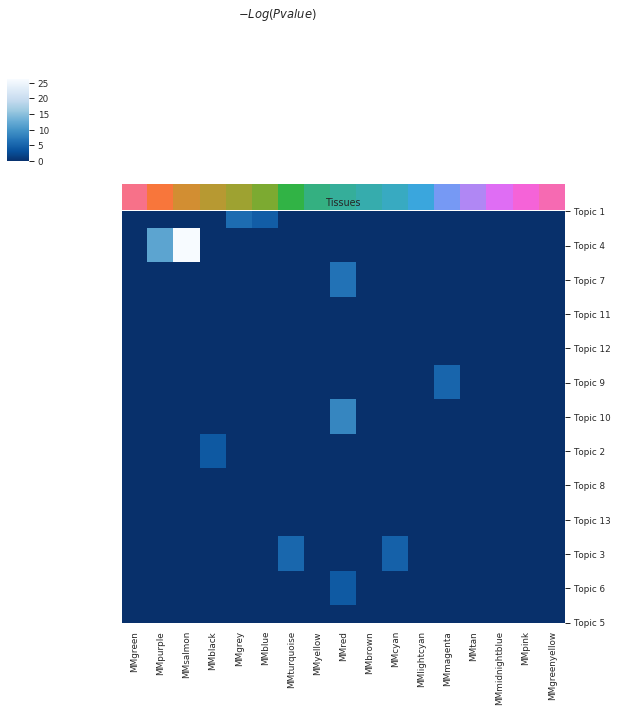

In [73]:
#df_cmap = df_cmap.sort_values(by=[c for c in df_cmap.columns], axis=0, ascending=True)
#create a color palette with the same number of colors as unique values in the Source column
network_pal = sns.color_palette('husl',n_colors=len(df_cmap.columns))

#Create a dictionary where the key is the category and the values are the
#colors from the palette we just created
network_lut = dict(zip(df_cmap.columns, network_pal))
network_col = df_cmap.columns.map(network_lut)
#Create a dictionary where the key is the category and the values are the
#colors from the palette we just created
network_lut = dict(zip(df_cmap.columns, network_pal))
network_col = df_cmap.columns.map(network_lut)

fig = plt.figure()
cm = sns.clustermap(df_cmap, row_cluster=False, col_cluster=False, metric='euclidean', vmin=0, cmap='Blues_r', col_colors=network_col)
cm.fig.suptitle('$-Log(Pvalue)$')
cm.ax_heatmap.set_title('Tissues')
cm.fig.savefig("topics_hsbm_wgcna.pdf")

In [74]:
from sklearn.metrics import v_measure_score

In [77]:
print("hsbm - wgcna %.3f"%v_measure_score(hsbm_list, wgcna_list))
print("hsbm - tm %.3f"%v_measure_score(hsbm_list.reindex_like(tm_list), tm_list))
print("tm - wgcna %.3f"%v_measure_score(tm_list, wgcna_list.reindex_like(tm_list)))

hsbm - wgcna 0.334
hsbm - tm 0.269
tm - wgcna 0.455
